In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [123]:
basedir = '../results/2021Nov17_192530'
hostnames = ['atkr'] + [f'h{i}' for i in range(8)]
transport_algos = ['TCPreno','TCPcubic']
test_time = 10
atkr_para_conns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
iperf_header = ['timestamp','src_addr','src_port','dest_addr','dest_port','transferID','interval','transferred_bytes','bits_per_second']

In [124]:
dfall = []
for host in hostnames:
    for atkr_para_conn in atkr_para_conns:
        for tpt_algo in transport_algos:
            dfi = pd.read_csv(f'{basedir}/{tpt_algo}/{atkr_para_conn}conn/iperf_{host}.csv', names=iperf_header)
            dfi['host'] = host
            dfi['transport'] = tpt_algo
            dfi['atkr_para_conn'] = atkr_para_conn
            dfall.append(dfi.tail(1))

dfbigboi = pd.concat(dfall)
dfbigboi

,timestamp,src_addr,src_port,dest_addr,dest_port,transferID,interval,transferred_bytes,bits_per_second,host,transport,atkr_para_conn
10,20211117192543,10.0.0.1,53420,10.0.0.10,5001,3,0.0-10.2,31211640,24401627,atkr,TCPreno,1
10,20211117192556,10.0.0.1,53448,10.0.0.10,5001,3,0.0-10.3,32022520,24955475,atkr,TCPcubic,1
32,20211117192610,10.0.0.1,0,10.0.0.10,5001,-1,0.0-10.3,63709104,49651063,atkr,TCPreno,2
32,20211117192625,10.0.0.1,0,10.0.0.10,5001,-1,0.0-10.5,30067520,23017805,atkr,TCPcubic,2
43,20211117192639,10.0.0.1,0,10.0.0.10,5001,-1,0.0-10.5,0,0,atkr,TCPreno,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10,20211117192912,10.0.0.9,38254,10.0.0.10,5001,3,0.0-10.5,0,0,h7,TCPcubic,8
10,20211117192927,10.0.0.9,38292,10.0.0.10,5001,3,0.0-10.5,5812272,4443204,h7,TCPreno,9
10,20211117192940,10.0.0.9,38332,10.0.0.10,5001,3,0.0-10.1,6782976,5390215,h7,TCPcubic,9
10,20211117192954,10.0.0.9,38370,10.0.0.10,5001,3,0.0-10.3,5907840,4567162,h7,TCPreno,10


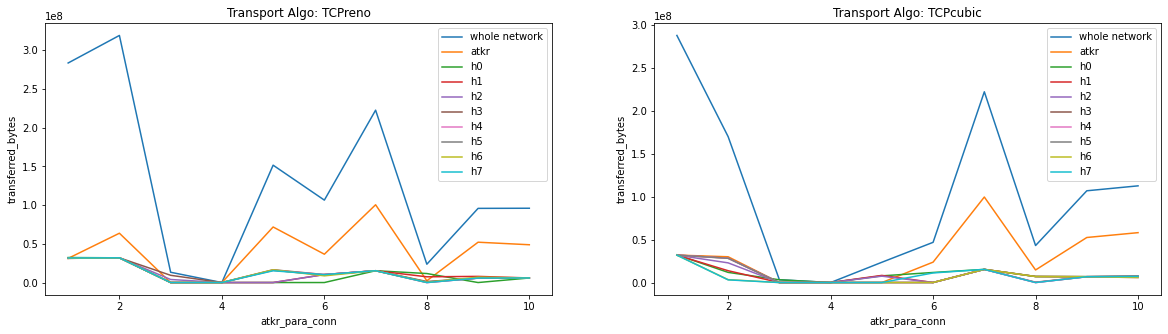

In [125]:
fig, axs = plt.subplots(1, len(transport_algos), figsize=(20,5))

for plti in range(len(transport_algos)):
    tpt_algo = transport_algos[plti]
    x_axis = []
    bytes_tx = {}
    whole_net = []
    for apc in atkr_para_conns:
        x_axis.append(apc)
        df0 = dfbigboi[dfbigboi['atkr_para_conn'] == apc]
        df1 = df0[df0['transport'] == tpt_algo]
        whole_net.append(0)
        for host in hostnames:
            if host not in bytes_tx:
                bytes_tx[host] = []
            try:
                bytes_tx[host].append(df1[df1['host'] == host]['transferred_bytes'].values[0])
            except:
                bytes_tx[host].append(-1)

            # bytes_tx[host][-1] /= 8 * test_time
            whole_net[-1] += bytes_tx[host][-1]

    axs[plti].plot(x_axis, whole_net, label='whole network')
    for host in hostnames:
        axs[plti].plot(x_axis, bytes_tx[host], label=host)
    axs[plti].legend()
    axs[plti].set_xlabel('atkr_para_conn')
    axs[plti].set_ylabel('transferred_bytes')
    axs[plti].set_title(f'Transport Algo: {tpt_algo}')